# Slash Data Analysis Task


### Step 1: Exploratory Data Analysis (EDA)


#### 1. Data Inspection:


In [1]:
# import lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [2]:
# read dataset csvfile  load dataset
sal = pd.read_csv('Amazon Sale Report.csv')

G:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# show the first few rows
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
sal.shape

(128975, 24)

In [5]:
# show columns names 
sal.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

### 2-Summary Statistics


In [6]:
sal.info() #128975 Entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [7]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


##  Step 2: Data Preprocessing


##### 1-Handling Missing Values:


In [8]:
# show no. of Null Values
sal.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

### 2.1.1 Removing Null Values that not effect and it  represents a small percentane of the data  (not effected)


#### all null in Courier Status has 0 in Qty  (the best case remove it because it samll )
#### all null in currency  has 0 in Qty  and null in Amount (the best case remove it because it samll )
#### all null in Amount  has 0 in Qty  and null in currency and canclled or null (the best case remove it  because it samll )
#### all null in ship-city , ship-state , ship-postal-code, ship-country,  (the best case remove it  because it  very samll )

In [9]:
# Removing Null Values
sal.dropna(subset=['Courier Status','currency','Amount','ship-state', 'ship-postal-code','ship-country','ship-city'],axis = 0,inplace=True)

In [10]:
sal.info() #116016 Entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-nul

In [11]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [12]:
sal.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         36558
B2B                       0
fulfilled-by          83621
Unnamed: 22           43921
dtype: int64

### 2.1.2 Droping  all Columns   (not effected)

In [13]:
sal['fulfilled-by'].value_counts()

Easy Ship    32395
Name: fulfilled-by, dtype: int64

In [14]:
sal['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [15]:
sal['Unnamed: 22'].value_counts()


False    72095
Name: Unnamed: 22, dtype: int64

In [16]:
sal['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [17]:
sal.drop(columns= ['Unnamed: 22', 'fulfilled-by'], inplace = True)

In [18]:
sal.info() #116016 Entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-nul

In [19]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [20]:
sal.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         36558
B2B                       0
dtype: int64

### 2.1.3  Filling NaN Values for    promotion-ids if  have promo get id if not no promo


In [21]:
sal['promotion-ids'].value_counts()

IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [22]:
sal['promotion-ids'].unique()

array(['Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Unive

In [23]:
sal['Date'].unique()

array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-22', '04-11-22',
       '04-10-22', '04-09-22', '04-08-22', '04-07-22', '04-06-22',
       '04-05-22', '04-04-22', '04-03-22', '04-02-22', '04-01-22',
       '03-31-22', '05-31-22', '05-30-22', '05-29-22', '05-28-22',
       '05-27-22', '05-26-22', '05-25-22', '05-24-22', '05-23-22',
       '05-22-22', '05-21-22', '05-20-22', '05-19-22', '05-18-22',
       '05-17-22', '05-16-22', '05-15-22', '05-14-22', '05-13-22',
       '05-12-22', '05-11-22', '05-10-22', '05-09-22', '05-08-22',
       '05-07-22', '05-06-22', '05-05-22', '05-04-22', '05-03-22',
       '05-02-22', '05-01-22', '06-29-22', '06-28-22', '06-27-22',
       '06-26-22', '06-25-22', '06-24-22', '06-23-22', '06-22-22',
       '06-21-22', '06-20-22', '06-19-22', '06-18-22', '06-17-

In [24]:
sal['promotion-ids'].fillna('no promotion',inplace=True)

In [25]:
sal.info() #116016 Entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-nul

In [26]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [27]:
sal.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

###  2. Data Type Conversion:


In [28]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,False
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [29]:
# Convert B2B column values to business and customer

sal['B2B'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)


In [30]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


In [31]:
#  converting Date column to datetime format
sal['Date'] = pd.to_datetime(sal['Date'])

In [32]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


In [33]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  object        
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016 no

In [34]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


###  3. Outlier Detection and Treatment:


##### The outliers in Qty it logic ,  I'm going to leave it , because all methods not see over 1 is not oulier   and all anther vaules is outlier 

In [35]:
sal['Qty'].unique()

array([1, 2, 3, 5, 4, 8], dtype=int64)

In [36]:
sal['Qty'].value_counts()

1    115637
2       337
3        31
4         8
5         2
8         1
Name: Qty, dtype: int64

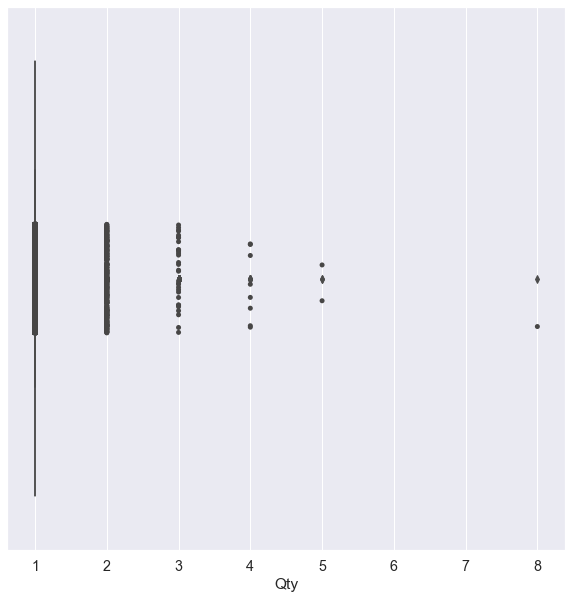

In [37]:
sns.boxplot(x='Qty', data=sal)
sns.stripplot(x='Qty', data=sal, color="#474646")

#### The outliers in Amount , I think it's real, and I can't remove it

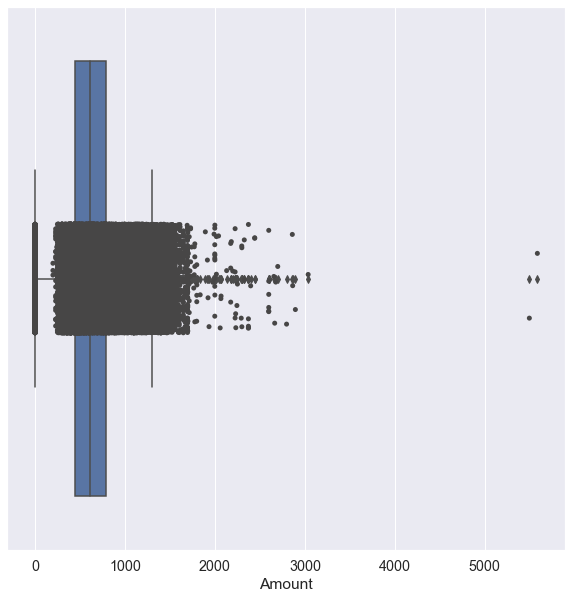

In [38]:
# Detecte by boxplot
sns.boxplot(x='Amount', data=sal)
sns.stripplot(x='Amount', data=sal, color="#474646")

In [39]:
#  Detecte iqr
Q1 = sal['Amount'].quantile(0.25)
Q3 = sal['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = sal[(sal['Amount'] < (Q1 - 1.5 * IQR)) | (sal['Amount'] > (Q3 + 1.5 * IQR))]


In [40]:
len(outliers)

3554

In [41]:
# Replace outliers with a maximum or minimum threshold value.
sal['Amount'] = sal['Amount'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

In [42]:
sal.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


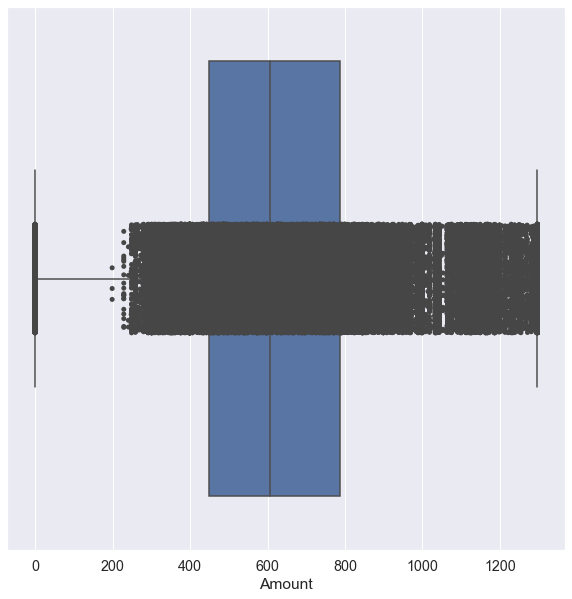

In [43]:
# after treat outier 
sns.boxplot(x='Amount', data=sal)
sns.stripplot(x='Amount', data=sal, color="#474646")

In [44]:
#  Detecte iqr
Q1 = sal['Amount'].quantile(0.25)
Q3 = sal['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliersafter= sal[(sal['Amount'] < (Q1 - 1.5 * IQR)) | (sal['Amount'] > (Q3 + 1.5 * IQR))]

In [45]:
len(outliersafter)

0

## Step 3: Data Visualization


In [46]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  object        
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016 no

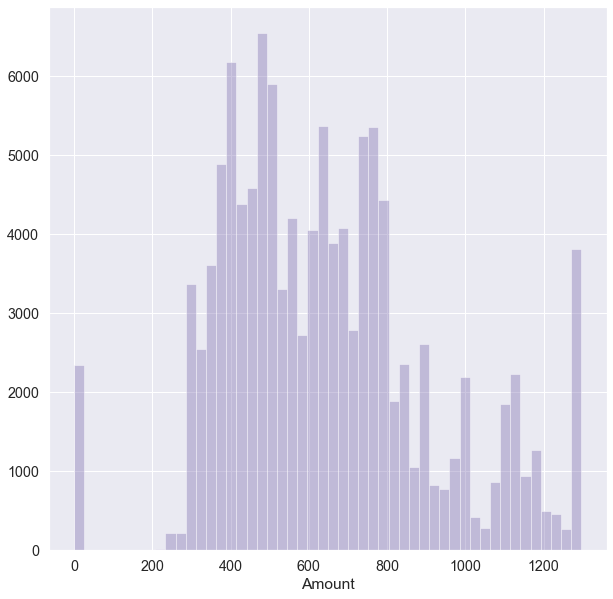

In [47]:
sns.distplot(sal['Amount'], kde=False, color='m')

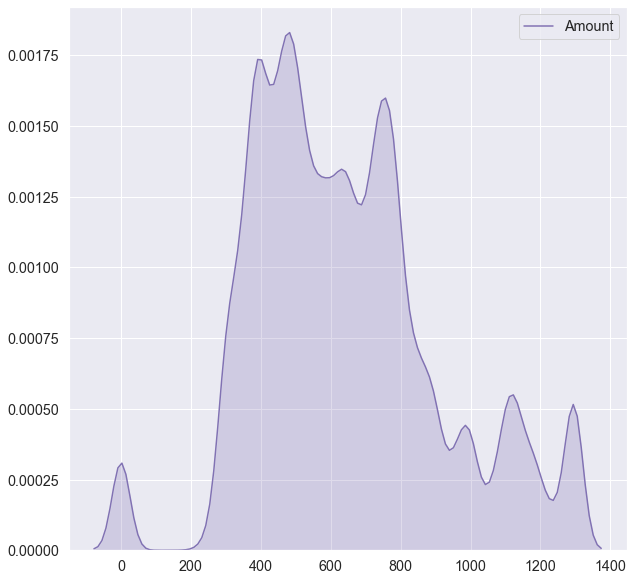

In [48]:
sns.kdeplot(sal['Amount'], shade=True, color='m')

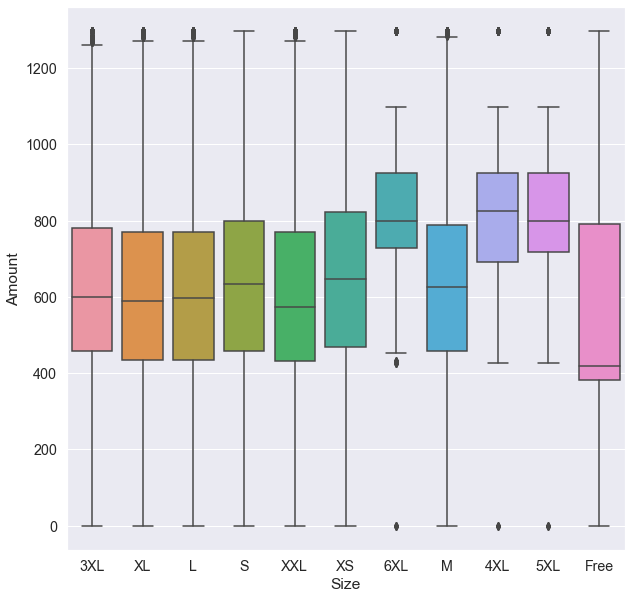

In [49]:
sns.boxplot(x="Size", y="Amount", data=sal)

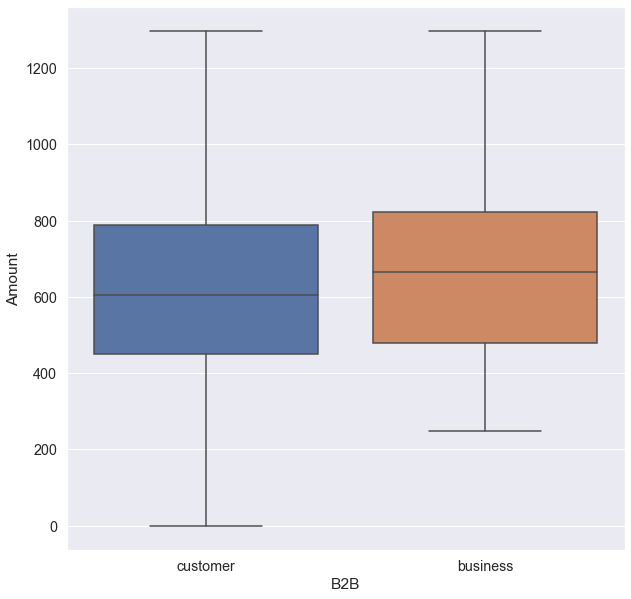

In [50]:
sns.boxplot(x="B2B", y="Amount", data=sal)

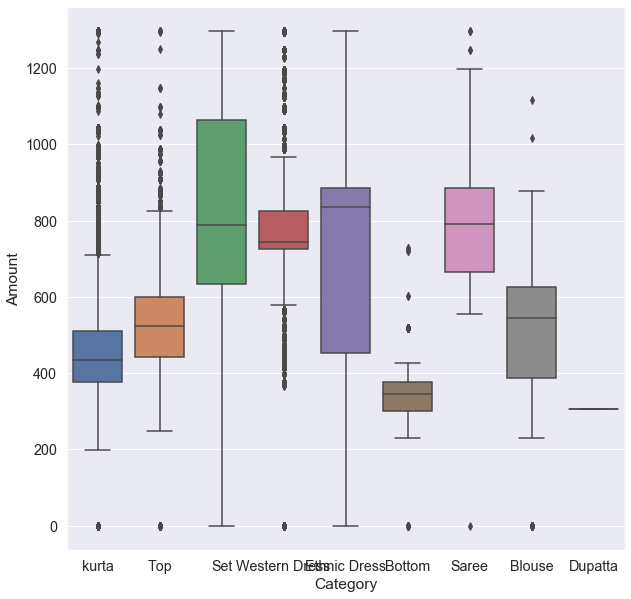

In [51]:
sns.boxplot(x="Category", y="Amount", data=sal)

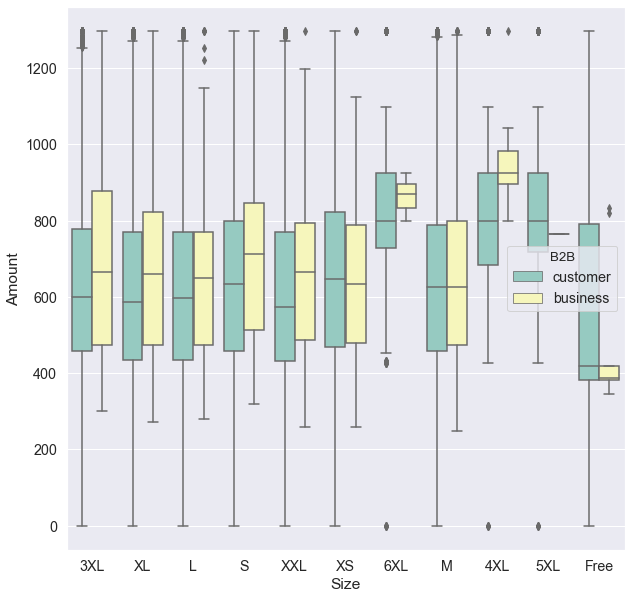

In [52]:
sns.boxplot(x="Size", y="Amount", hue="B2B", data=sal, palette='Set3')

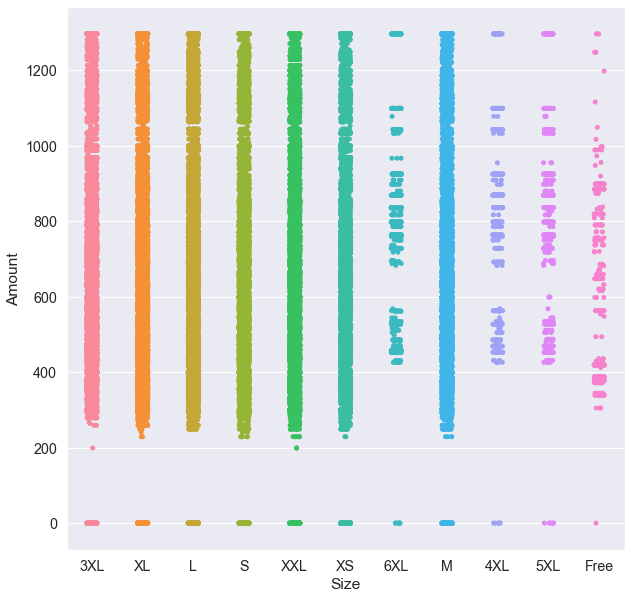

In [53]:
sns.stripplot(x="Size", y="Amount", data=sal)

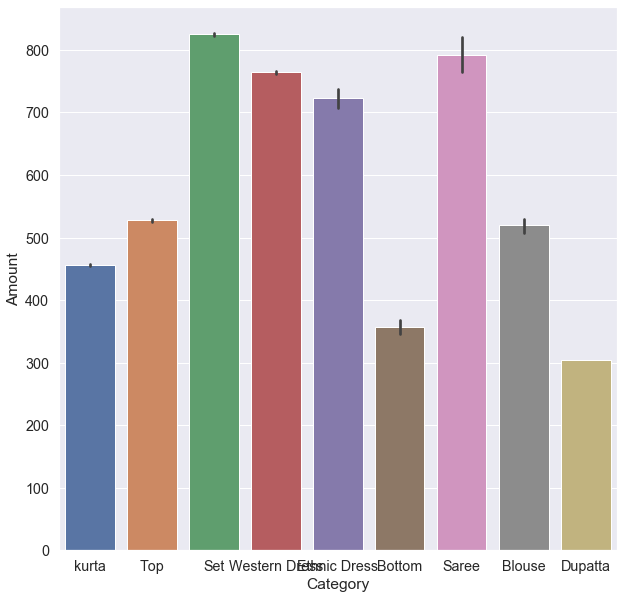

In [54]:
sns.barplot(x='Category', y='Amount', data=sal)

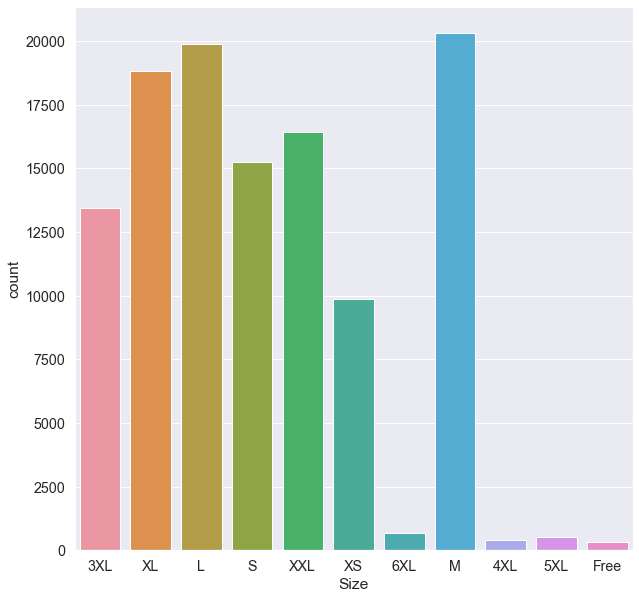

In [55]:
ax=sns.countplot(x='Size' ,data=sal)

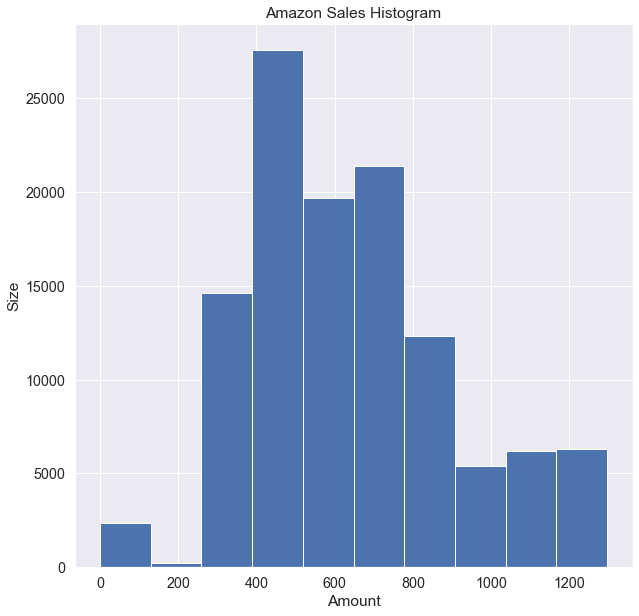

In [56]:
plt.hist(sal["Amount"])
plt.xlabel('Amount')
plt.ylabel('Size')
plt.title('Amazon Sales Histogram')
plt.show()

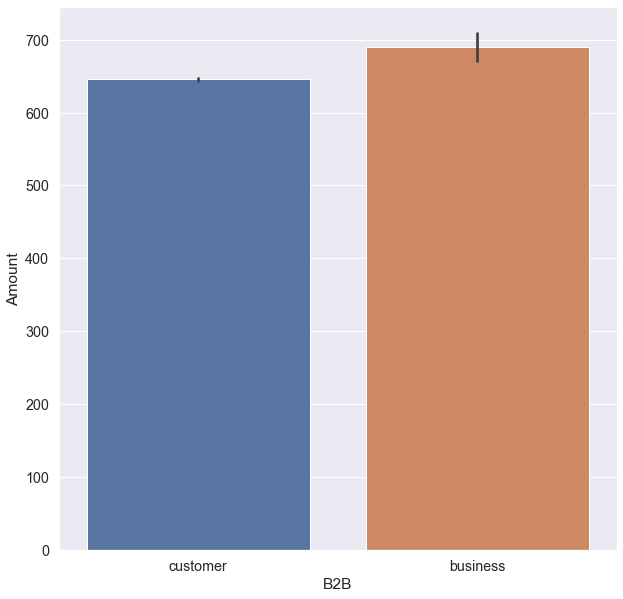

In [57]:
sns.barplot(x='B2B', y='Amount', data=sal)

In [58]:
sal.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)


,Size,Qty
6,M,20422
5,L,19963
8,XL,18898
10,XXL,16487
7,S,15309
0,3XL,13505
9,XS,9928
3,6XL,687
2,5XL,512
1,4XL,396


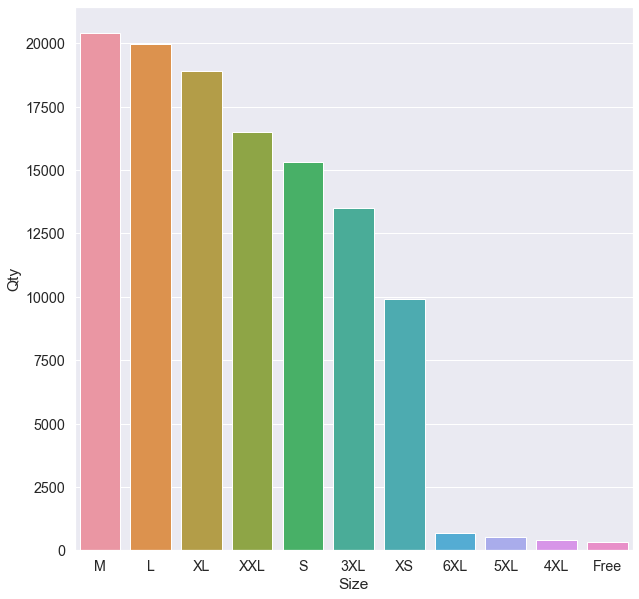

In [59]:
S_Qty=sal.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)

In [60]:
saltodash  = sal
saltodash.to_csv('cleanedtodash.csv',";")

In [63]:
saltodash.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


##  Step 4: Predictive Modeling


In [64]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  object        
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016 no

In [65]:
sal['Status'].value_counts()

Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                         5628
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [66]:
sal['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [69]:
sal['Status'] = le.fit_transform(sal['Status']) 

In [70]:
sal['Status'].unique()

array([ 5,  3,  0, 10,  9,  6,  7, 11,  8,  1,  2,  4])

In [71]:
sal['Status'].value_counts()

3     77580
5     28754
0      5628
10     1947
8       973
1       656
2       281
11      145
7        35
9        11
6         5
4         1
Name: Status, dtype: int64

In [72]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,5,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,2022-04-30,3,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,2022-04-30,3,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,2022-04-30,3,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,2022-04-30,3,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


In [73]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  int32         
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016 no

In [74]:
sal['Size'] = le.fit_transform(sal['Size']) 

In [75]:
sal['Size'].unique()

array([ 0,  8,  5,  7, 10,  9,  3,  6,  1,  2,  4])

In [76]:
sal['Courier Status'] = le.fit_transform(sal['Courier Status']) 

In [77]:
sal['Courier Status'].unique()

array([0, 1])

In [78]:
sal['B2B'] = le.fit_transform(sal['B2B']) 

In [79]:
sal['B2B'].unique()

array([1, 0])

In [80]:
sal['Category'] = le.fit_transform(sal['Category']) 

In [81]:
sal['Courier Status'].unique()

array([0, 1])

In [82]:
sal['Category'] = le.fit_transform(sal['Category']) 

In [83]:
sal['Category'].unique()

array([8, 6, 5, 7, 3, 1, 4, 0, 2], dtype=int64)

In [84]:
sal['ship-service-level'] = le.fit_transform(sal['ship-service-level']) 

In [85]:
sal['ship-service-level'].unique()

array([1, 0])

In [86]:
sal['Fulfilment'] = le.fit_transform(sal['Fulfilment']) 

In [87]:
sal['Fulfilment'].unique()

array([1, 0])

In [88]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  int32         
 4   Fulfilment          116016 non-null  int32         
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  int32         
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  int64         
 10  Size                116016 non-null  int32         
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  int32         
 13  Qty                 116016 no

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x = sal [["ship-postal-code","Size","Courier Status","B2B","Category","ship-service-level","Amount","Qty","Fulfilment"]]
y = sal["Status"]

In [91]:
x.head()

,ship-postal-code,Size,Courier Status,B2B,Category,ship-service-level,Amount,Qty,Fulfilment
1,560085.0,0,0,1,8,1,406.0,1,1
2,410210.0,8,0,0,8,0,329.0,1,0
4,600073.0,0,0,1,6,0,574.0,1,0
5,201102.0,8,0,1,5,0,824.0,1,0
6,160036.0,5,0,1,5,0,653.0,1,0


In [92]:
y

1         5
2         3
4         3
5         3
6         3
         ..
128970    3
128971    3
128972    3
128973    3
128974    3
Name: Status, Length: 116016, dtype: int32

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [94]:
x_train.head()

,ship-postal-code,Size,Courier Status,B2B,Category,ship-service-level,Amount,Qty,Fulfilment
75399,110030.0,10,0,1,8,1,736.0,1,1
95569,400601.0,0,0,1,5,0,583.0,1,0
42730,751017.0,10,0,1,5,0,912.0,1,0
60878,362220.0,5,0,1,5,0,1152.0,1,0
22401,828104.0,7,0,1,8,1,368.0,1,1


In [95]:
x_test.head()

,ship-postal-code,Size,Courier Status,B2B,Category,ship-service-level,Amount,Qty,Fulfilment
13532,110078.0,9,1,1,5,0,648.0,1,0
111389,533222.0,7,0,1,8,0,301.0,1,0
20447,560068.0,7,0,1,5,1,888.0,1,1
76259,144416.0,6,0,1,5,0,545.0,1,0
69202,600074.0,6,0,1,6,1,574.0,1,1


In [96]:
y_train.head()

75399    5
95569    3
42730    3
60878    3
22401    5
Name: Status, dtype: int32

In [97]:
y_test.head()

13532     0
111389    3
20447     5
76259     3
69202     5
Name: Status, dtype: int32

####  1-  DecisionTreeClassifier

In [98]:
# Train Model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()

In [99]:
modelDTC.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Evaluate Model

In [100]:
y_predDTC = modelDTC.predict(x_test)
y_predDTC

array([0, 3, 5, ..., 5, 5, 5])

In [101]:
y_test

13532     0
111389    3
20447     5
76259     3
69202     5
         ..
115192    3
24795     0
59204     5
66066     5
64936     5
Name: Status, Length: 23204, dtype: int32

In [102]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [103]:
accDTC = accuracy_score(y_test, y_predDTC) *100
print("accuracy = ",accDTC)

accuracy =  93.78555421479055


In [104]:
print(classification_report(y_test, y_predDTC))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1167
           1       0.21      0.29      0.25       120
           2       0.61      0.58      0.59        59
           3       1.00      1.00      1.00     15376
           4       0.00      0.00      0.00         1
           5       0.91      0.89      0.90      5859
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         7
           8       0.08      0.10      0.09       189
           9       0.00      0.00      0.00         4
          10       0.08      0.10      0.08       384
          11       0.03      0.03      0.03        38

    accuracy                           0.94     23204
   macro avg       0.32      0.32      0.32     23204
weighted avg       0.94      0.94      0.94     23204



G:\anacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2- RandomForestClassifier

In [105]:
# Train Model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
modelRFC= RandomForestClassifier()

In [106]:
modelRFC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
y_predRFC = modelRFC.predict(x_test)
y_predRFC

array([0, 3, 5, ..., 5, 5, 5])

In [112]:
y_test

13532     0
111389    3
20447     5
76259     3
69202     5
         ..
115192    3
24795     0
59204     5
66066     5
64936     5
Name: Status, Length: 23204, dtype: int32

In [113]:
accRFC = accuracy_score(y_test, y_predRFC) *100
print("accuracy = ",accRFC)

accuracy =  96.16014480262024


In [114]:
print(classification_report(y_test, y_predRFC))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1167
           1       0.35      0.14      0.20       120
           2       0.61      0.66      0.63        59
           3       1.00      1.00      1.00     15376
           4       0.00      0.00      0.00         1
           5       0.91      0.97      0.94      5859
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         7
           8       0.09      0.03      0.04       189
           9       0.00      0.00      0.00         4
          10       0.12      0.04      0.06       384
          11       0.00      0.00      0.00        38

    accuracy                           0.96     23204
   macro avg       0.33      0.32      0.32     23204
weighted avg       0.94      0.96      0.95     23204



G:\anacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
print("accuracy for RFC  = ",accRFC)
print("accuracy for DTC = ",accDTC)

accuracy for RFC  =  96.16014480262024
accuracy for DTC =  93.78555421479055


#####  RandomForest   better than decision tree 

### cross_validate

#### 1- For DecisionTreeClassifier

In [116]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [117]:
cv_results_dtc = cross_validate(modelDTC, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results_dtc

G:\anacoda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.93427944, 0.98714328, 0.97217798, 0.93328285, 0.93926644,
        0.92629981, 1.04650402, 0.96719813, 0.33133483, 0.31138897]),
 'score_time': array([0.06582332, 0.01595354, 0.01496005, 0.0528574 , 0.06735682,
        0.06183577, 0.02393508, 0.01993871, 0.00398922, 0.00598478]),
 'test_score': array([0.93906223, 0.94319945, 0.94561283, 0.93923461, 0.94138942,
        0.93699362, 0.93707439, 0.93897078, 0.92983364, 0.92793725]),
 'train_score': array([0.99904227, 0.99900396, 0.99899439, 0.99893692, 0.99888904,
        0.99905185, 0.99901355, 0.99895609, 0.99901355, 0.99904228])}

In [118]:
cv_results_dtc['train_score'].mean()

0.9989943915322895

In [119]:
cv_results_dtc['test_score'].mean()

0.9379308206865226

### 2- For RandomForestClassifier

In [120]:
cv_results_rfc = cross_validate(modelRFC, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results_rfc

G:\anacoda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([39.59861565, 37.81111908, 37.69219208, 39.06329012, 37.91616082,
        38.0661552 , 38.81993484, 37.9651351 , 14.81581736, 14.71200013]),
 'score_time': array([6.99480295, 1.32222342, 1.99618483, 6.18314219, 2.31402349,
        1.78279233, 4.10126019, 2.74188805, 0.37005258, 0.3613019 ]),
 'test_score': array([0.96276504, 0.96336838, 0.96345458, 0.96354077, 0.96405792,
        0.96302362, 0.96164124, 0.96103784, 0.95448668, 0.95543488]),
 'train_score': array([0.99900396, 0.99895608, 0.99897523, 0.99889862, 0.99885073,
        0.99900396, 0.9989944 , 0.99889863, 0.99898482, 0.99901355])}

In [121]:
cv_results_rfc['train_score'].mean() *100

99.89579980736349

In [122]:
cv_results_rfc['test_score'].mean() *100

96.12810946443535

In [123]:
import joblib

# Save the Random Forest model
joblib.dump(modelRFC, 'random_forest_model.pkl')

['random_forest_model.pkl']

##  Step 5: Dashboard Development


In [124]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,5,1,Amazon.in,1,JNE3781,JNE3781-KR-XXXL,8,...,0,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,1
2,2,404-0687676-7273146,2022-04-30,3,0,Amazon.in,0,JNE3371,JNE3371-KR-XL,8,...,0,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0
4,4,407-1069790-7240320,2022-04-30,3,0,Amazon.in,0,JNE3671,JNE3671-TU-XXXL,6,...,0,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,1
5,5,404-1490984-4578765,2022-04-30,3,0,Amazon.in,0,SET264,SET264-KR-NP-XL,5,...,0,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1
6,6,408-5748499-6859555,2022-04-30,3,0,Amazon.in,0,J0095,J0095-SET-L,5,...,0,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1


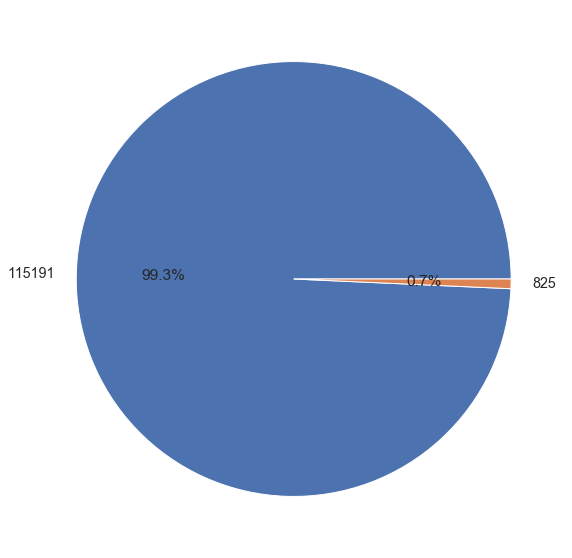

In [125]:
# Checking B2B Data  by using pie chart 
B2B_Check = sal['B2B'].value_counts()
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')

plt.show()

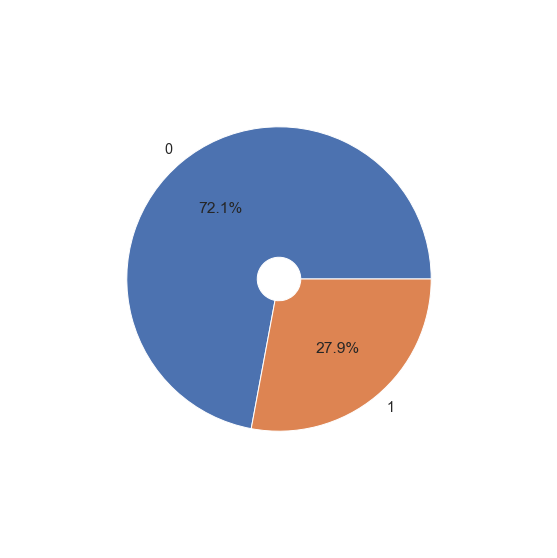

In [126]:
#  Prepare data for pie chart
a1 = sal['Fulfilment'].value_counts()
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

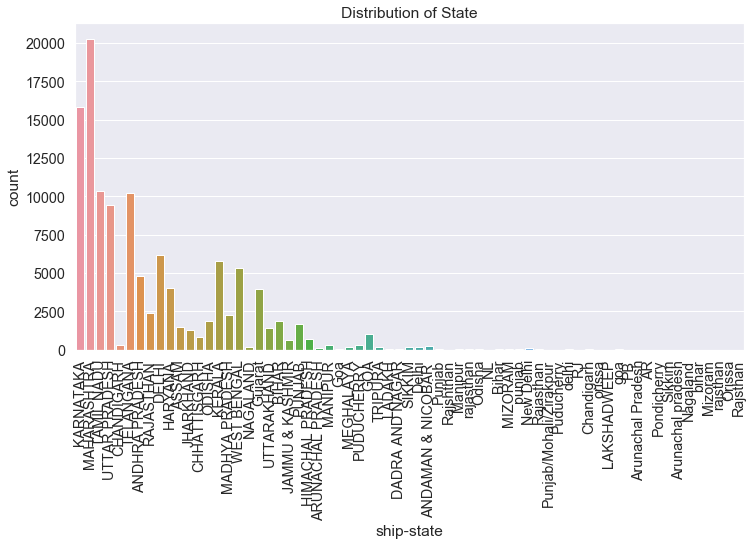

In [127]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=sal, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


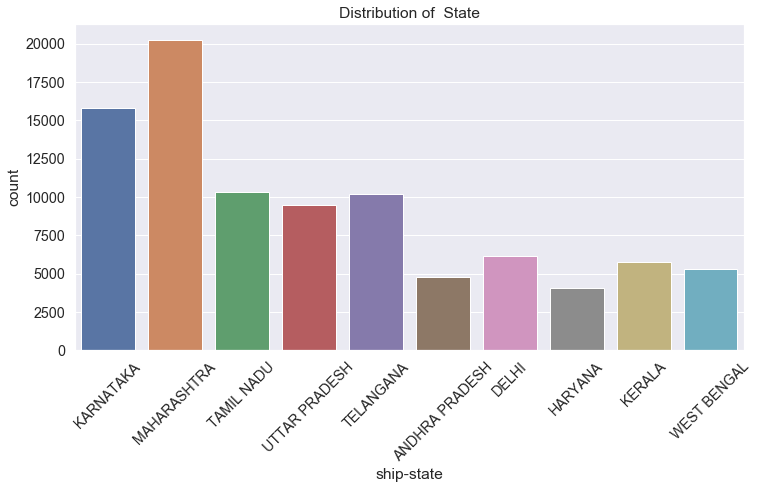

In [128]:
# top_10_States 
top_10_state = sal['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=sal[sal['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x15a2c3c0808>,
 [Text(1.5261647863588883, 1.2614361041599091, 'MAHARASHTRA'),
  Text(-0.679777109795791, 1.8596513331798739, 'KARNATAKA'),
  Text(-1.874400586309158, 0.6379831048263628, 'TAMIL NADU'),
  Text(-1.8444367773027244, -0.7200367869304602, 'TELANGANA'),
  Text(-0.9982843514785638, -1.7099205693812285, 'UTTAR PRADESH'),
  Text(0.006476133918828644, -1.9799894089841659, 'DELHI'),
  Text(0.7891973263444261, -1.8159205874957227, 'KERALA'),
  Text(1.4036444659967693, -1.3964892456000675, 'WEST BENGAL'),
  Text(1.792364434913258, -0.841326174832376, 'ANDHRA PRADESH'),
  Text(1.9612449419708151, -0.2718791599109708, 'HARYANA')],
 [Text(0.8324535198321209, 0.6880560568144959, '21.99%'),
  Text(-0.37078751443406777, 1.0143552726435676, '17.18%'),
  Text(-1.0224003198049951, 0.34799078445074333, '11.22%'),
  Text(-1.0060564239833043, -0.3927473383257056, '11.07%'),
  Text(-0.5445187371701257, -0.9326839469352155, '10.26%'),
  Text(0.003532436682997442, -

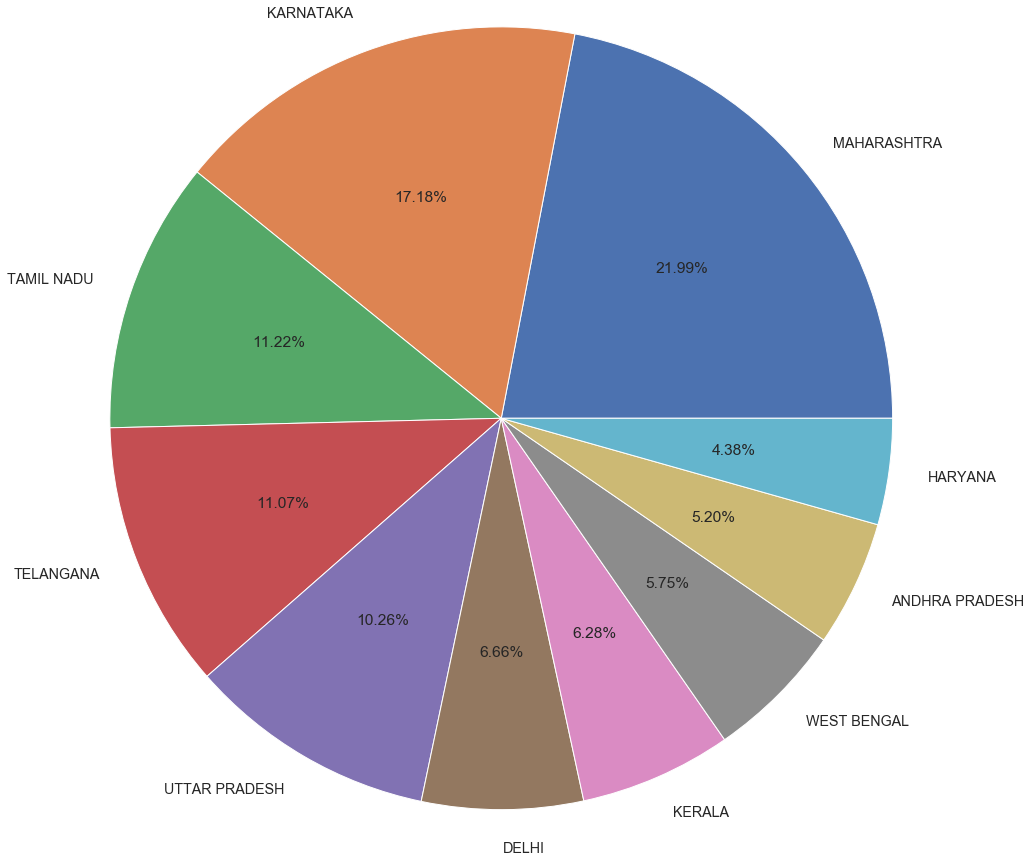

In [129]:
names = sal["ship-state"].value_counts().index
value = sal["ship-state"].value_counts().values
plt.pie(value[:10],labels=names[:10],autopct='%1.2f%%',radius=1.8)

([<matplotlib.patches.Wedge at 0x15a2c438e48>,
 [Text(1.68721258638461, 1.0362015674304665, '6'),
  Text(-0.13741534674739264, 1.9752258155659808, '5'),
  Text(-1.7806888514640988, 0.865763948355133, '8'),
  Text(-1.7357212525538577, -0.9527180765750526, '10'),
  Text(-0.415104936290008, -1.9359979059564267, '7'),
  Text(1.062481122780604, -1.670788395858335, '0'),
  Text(1.844467230247861, -0.7199587741959846, '9'),
  Text(1.972709602615644, -0.1697551876910656, '3'),
  Text(1.9771747925080776, -0.10573476188388127, '2'),
  Text(1.9791720349763222, -0.0572543095992244, '1'),
  Text(1.9799175562412443, -0.018068494339579303, '4')],
 [Text(0.9202977743916054, 0.5652008549620727, '17.53%'),
  Text(-0.0749538254985778, 1.077395899399626, '17.15%'),
  Text(-0.9712848280713267, 0.47223488092098165, '16.24%'),
  Text(-0.9467570468475587, -0.5196644054045741, '14.15%'),
  Text(-0.22642087434000435, -1.0559988577944146, '13.15%'),
  Text(0.5795351578803294, -0.9113391250136372, '11.60%'),
  Te

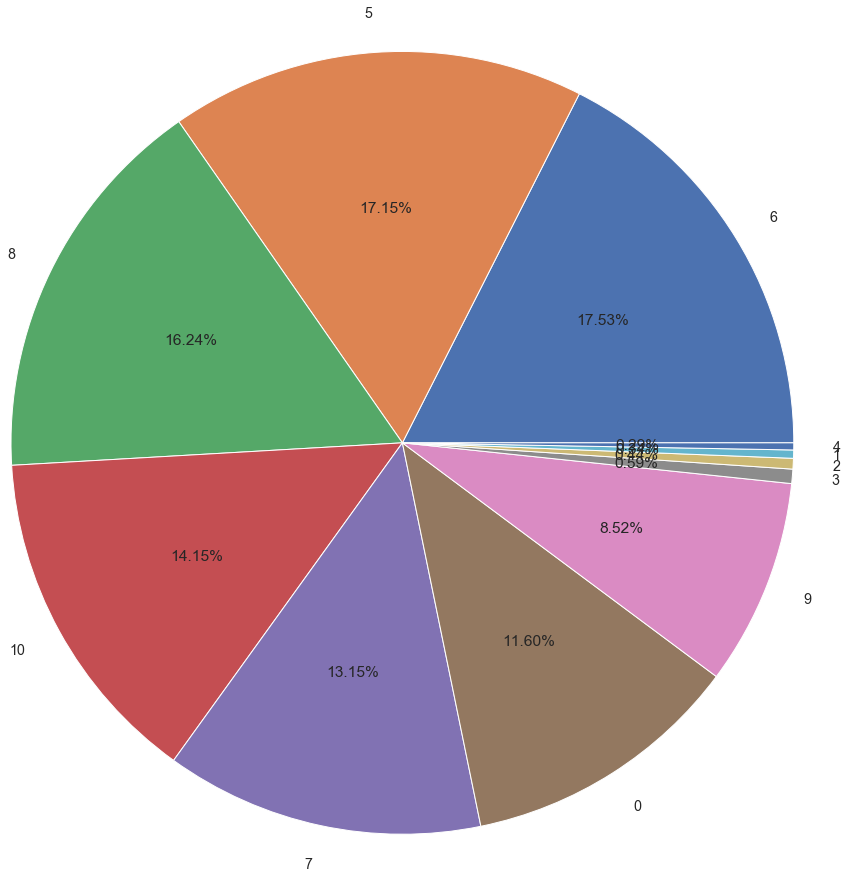

In [130]:
names = sal["Size"].value_counts().index
value = sal["Size"].value_counts().values
plt.pie(value[:20],labels=names[:20],autopct='%1.2f%%',radius=1.8)

In [131]:
sal2 = sal

In [132]:
sal2.to_csv('cleaned.csv',";")

In [133]:
sal2

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,5,1,Amazon.in,1,JNE3781,JNE3781-KR-XXXL,8,...,0,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,1
2,2,404-0687676-7273146,2022-04-30,3,0,Amazon.in,0,JNE3371,JNE3371-KR-XL,8,...,0,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0
4,4,407-1069790-7240320,2022-04-30,3,0,Amazon.in,0,JNE3671,JNE3671-TU-XXXL,6,...,0,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,1
5,5,404-1490984-4578765,2022-04-30,3,0,Amazon.in,0,SET264,SET264-KR-NP-XL,5,...,0,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1
6,6,408-5748499-6859555,2022-04-30,3,0,Amazon.in,0,J0095,J0095-SET-L,5,...,0,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,3,0,Amazon.in,0,JNE3697,JNE3697-KR-XL,8,...,0,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,no promotion,1
128971,128971,402-9551604-7544318,2022-05-31,3,0,Amazon.in,0,SET401,SET401-KR-NP-M,5,...,0,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1
128972,128972,407-9547469-3152358,2022-05-31,3,0,Amazon.in,0,J0157,J0157-DR-XXL,7,...,0,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,no promotion,1
128973,128973,402-6184140-0545956,2022-05-31,3,0,Amazon.in,0,J0012,J0012-SKD-XS,5,...,0,1,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1
